# Cardiovascular Prediction

## 1. Import Lib

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [ ]:
raw = pd.read_csv('cardio_data_processed.csv')
raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


## 3. EDA

### Get Data Info

In [ ]:
raw.nunique()

,0
id,68205
age,8061
gender,2
height,106
weight,278
ap_hi,86
ap_lo,58
cholesterol,3
gluc,3
smoke,2


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68205.0,49972.410498,28852.138290,0.000000,24991.000000,50008.000000,74878.000000,99999.000000
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
raw.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
raw.duplicated().sum()

0

### Visualize

In [ ]:
object_col = raw.select_dtypes(include='object').columns
num_col = raw.select_dtypes(exclude='object').columns
print(object_col)
print(num_col)

Index(['bp_category', 'bp_category_encoded'], dtype='object')
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi'],
      dtype='object')


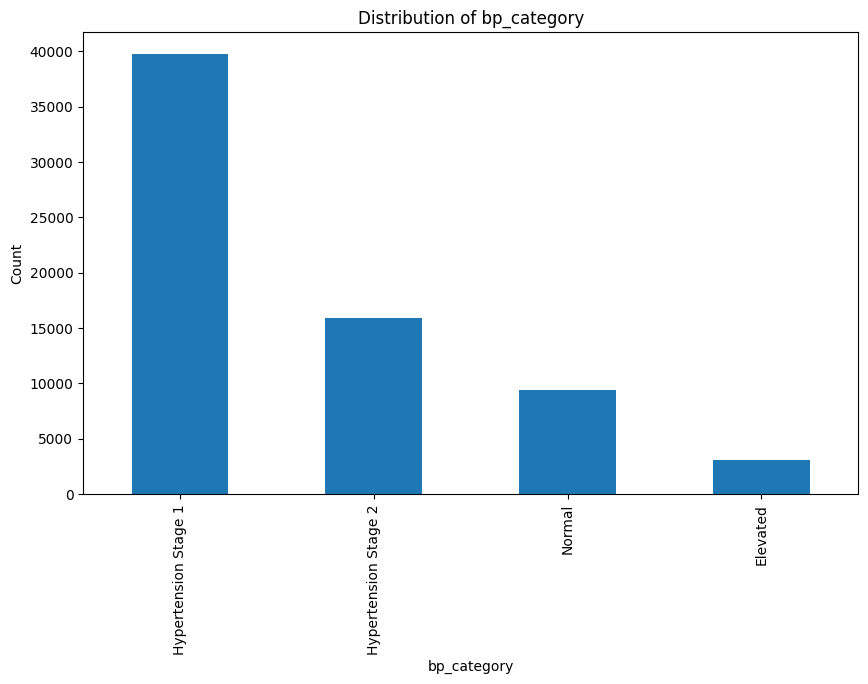

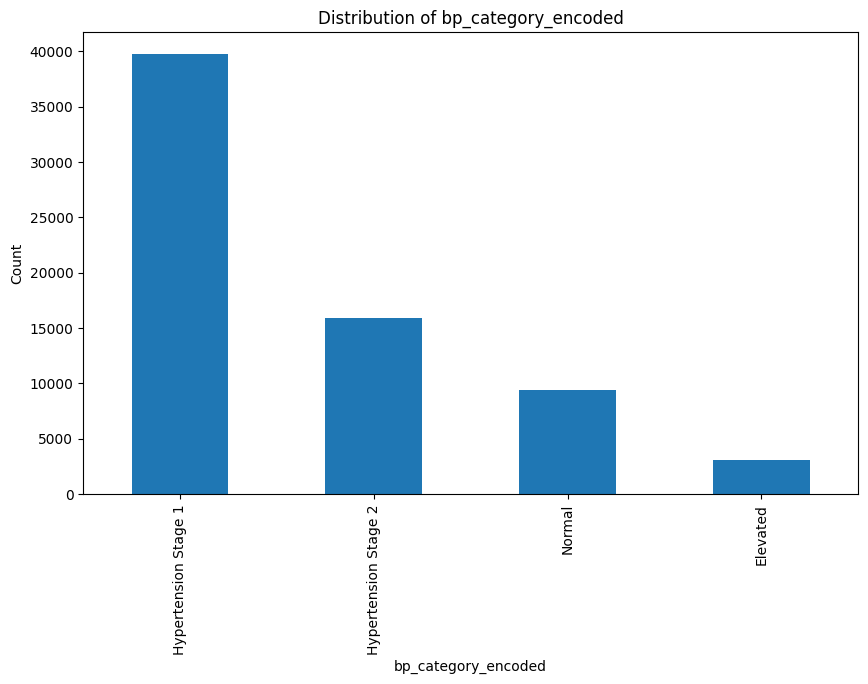

In [ ]:
for col in object_col:
    plt.figure(figsize=(10, 6))
    raw[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

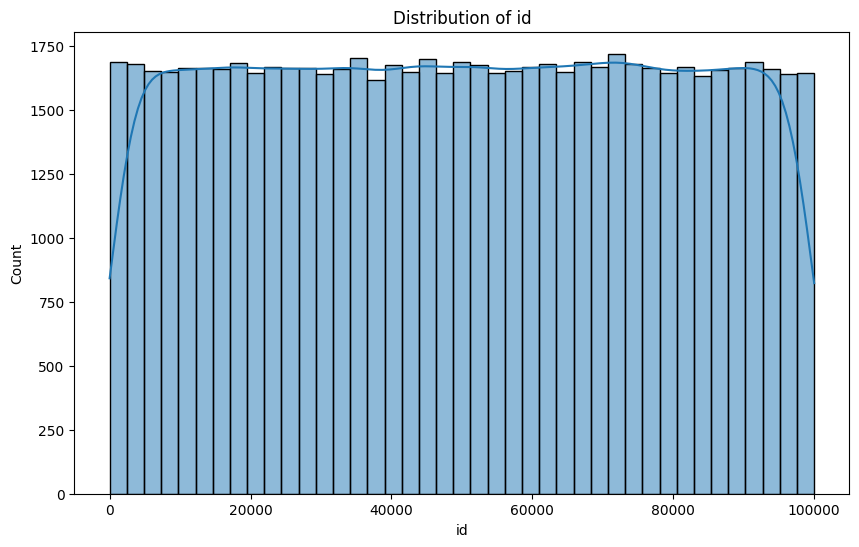

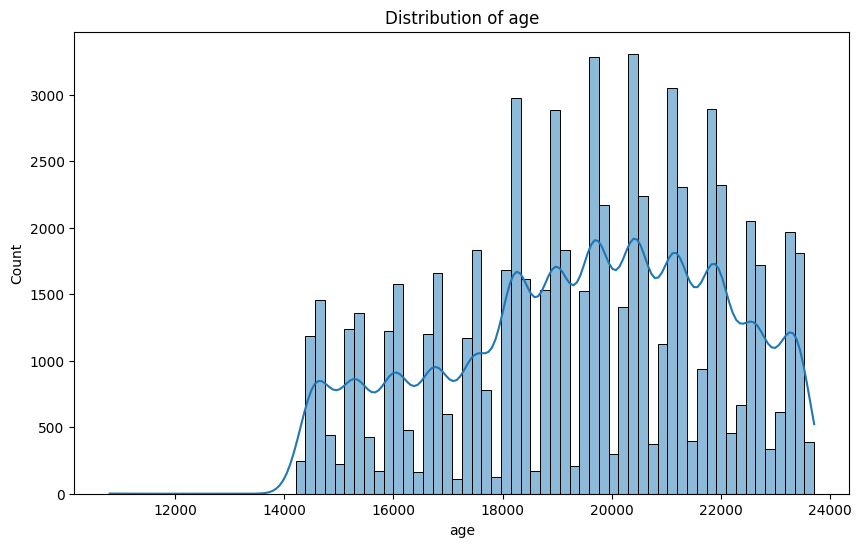

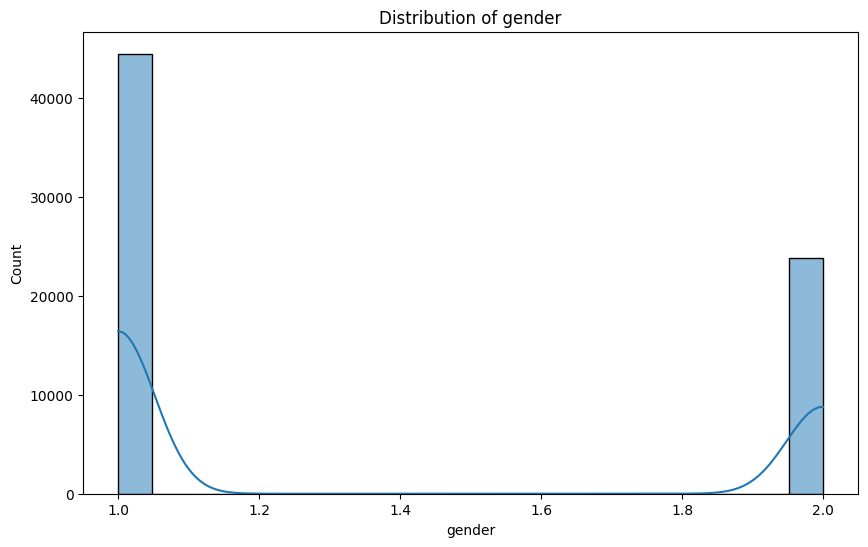

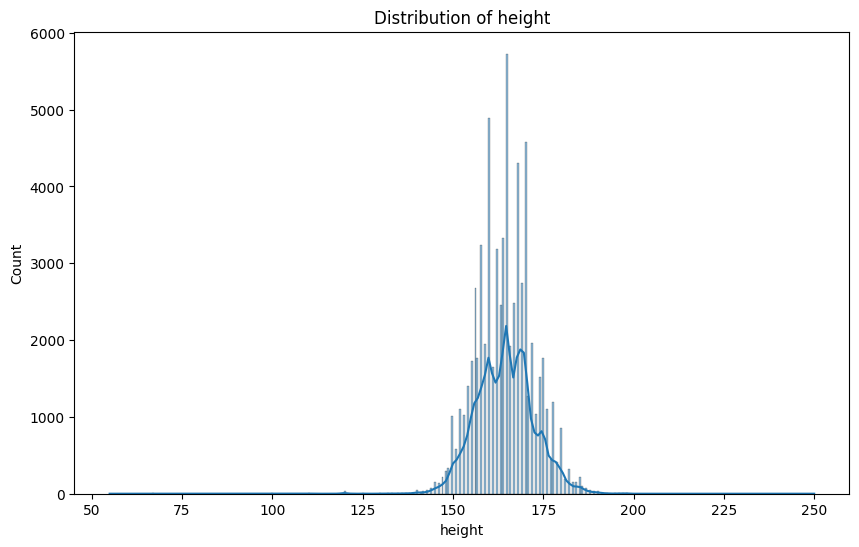

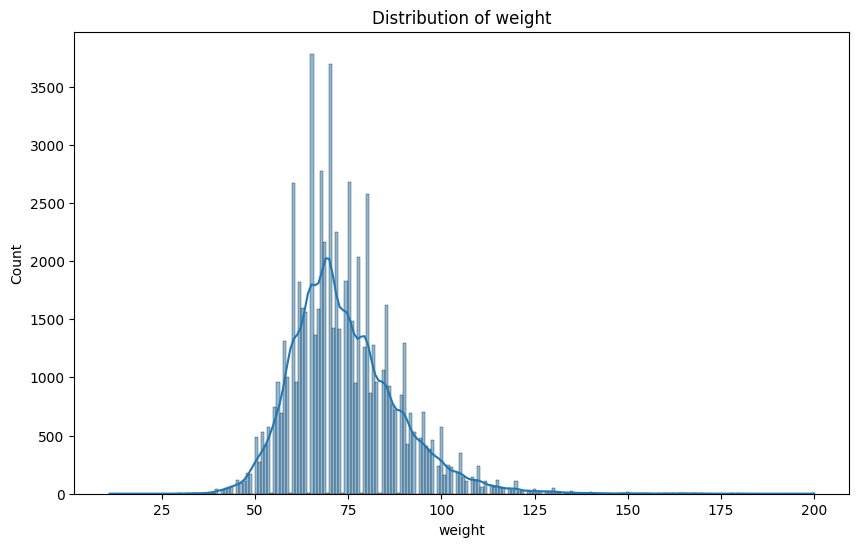

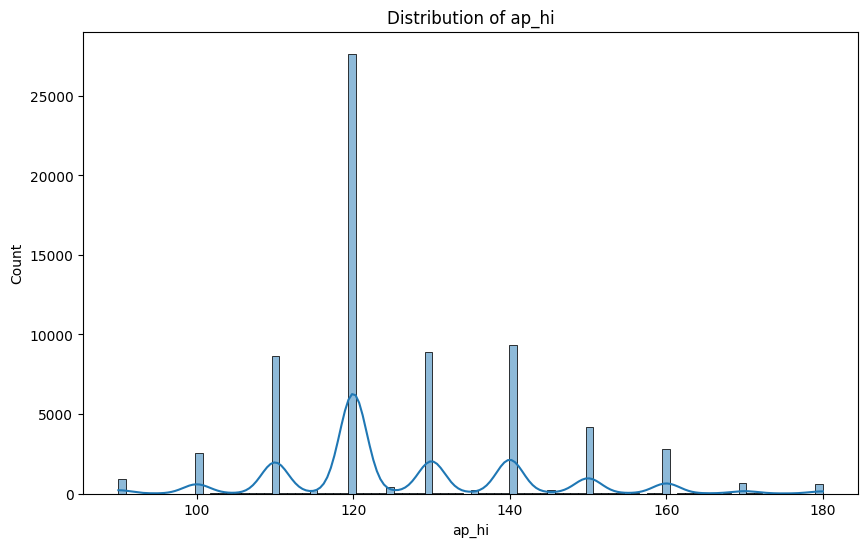

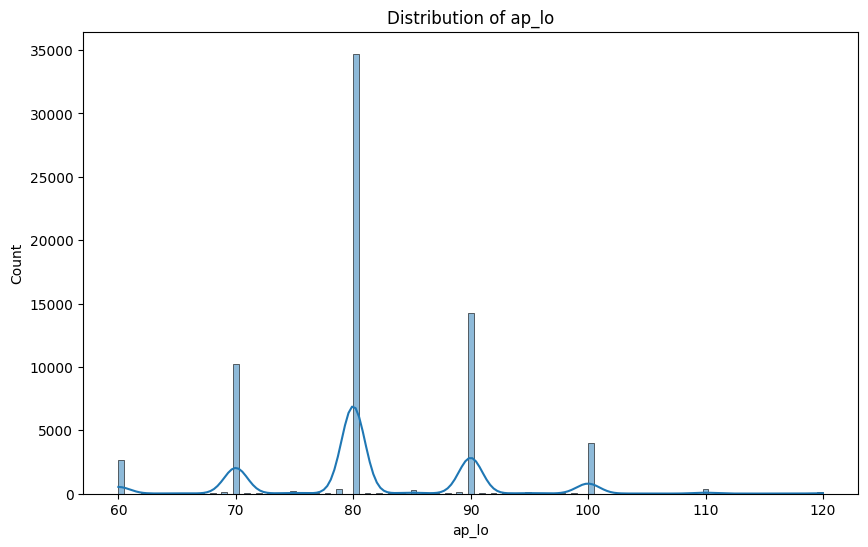

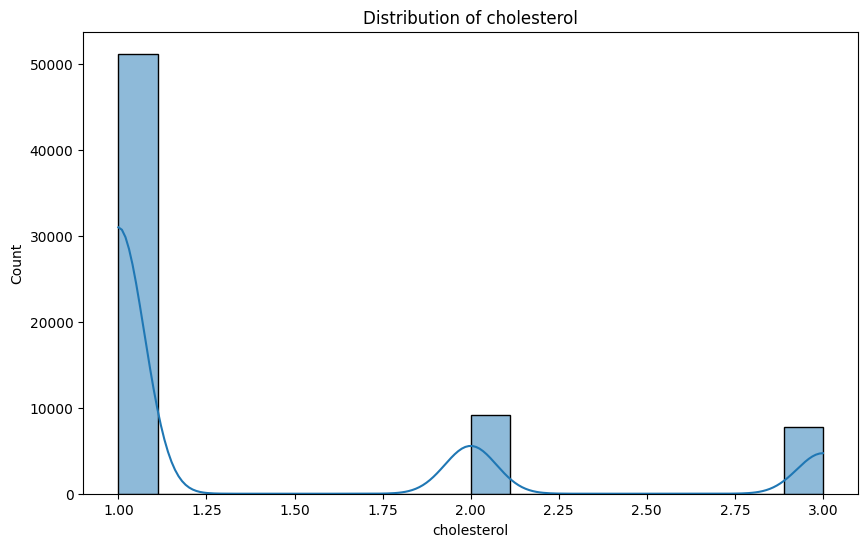

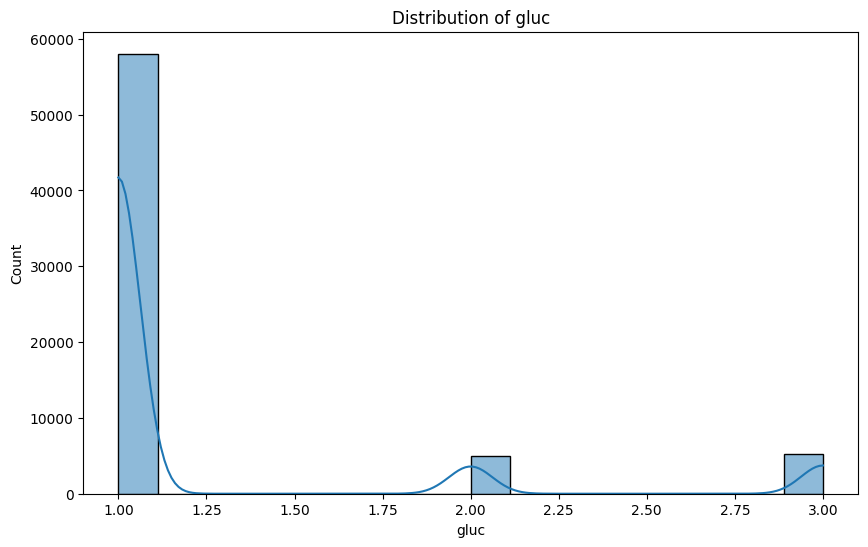

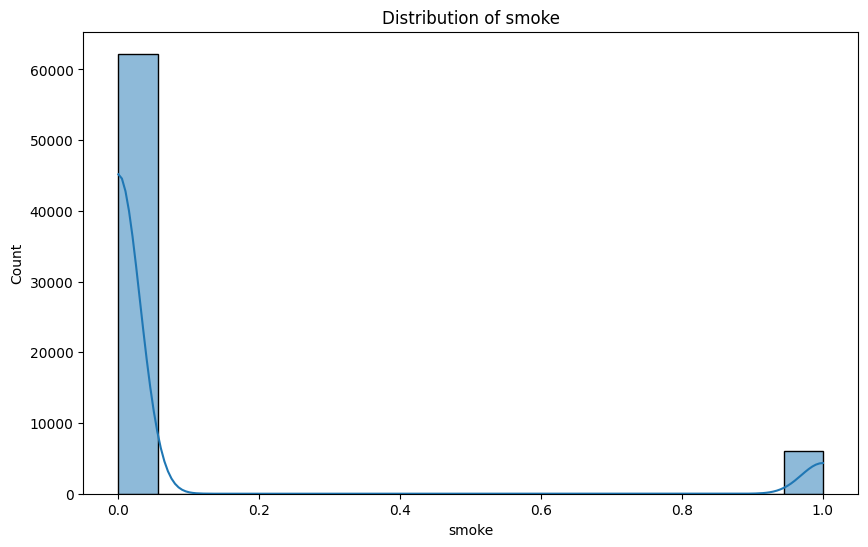

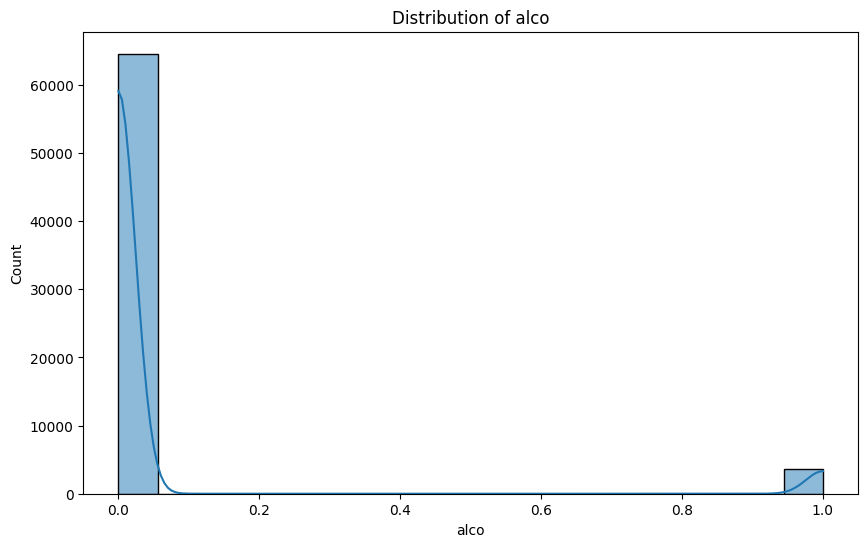

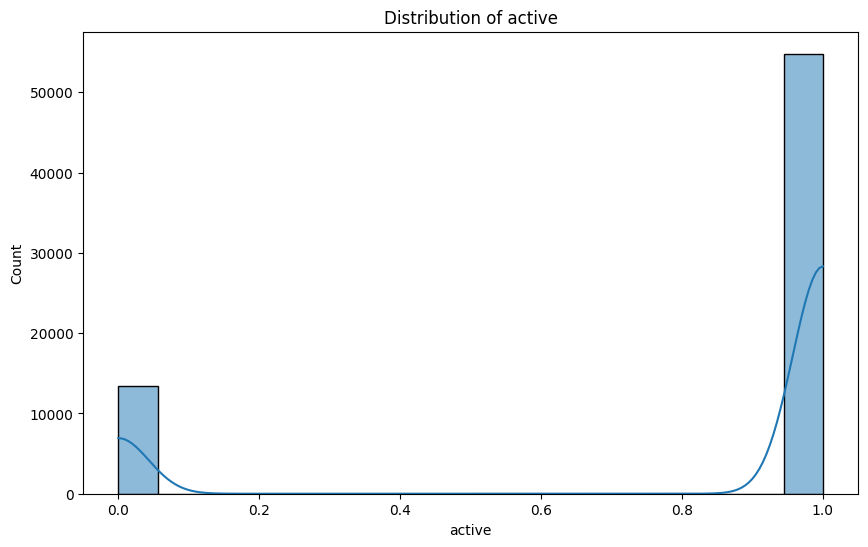

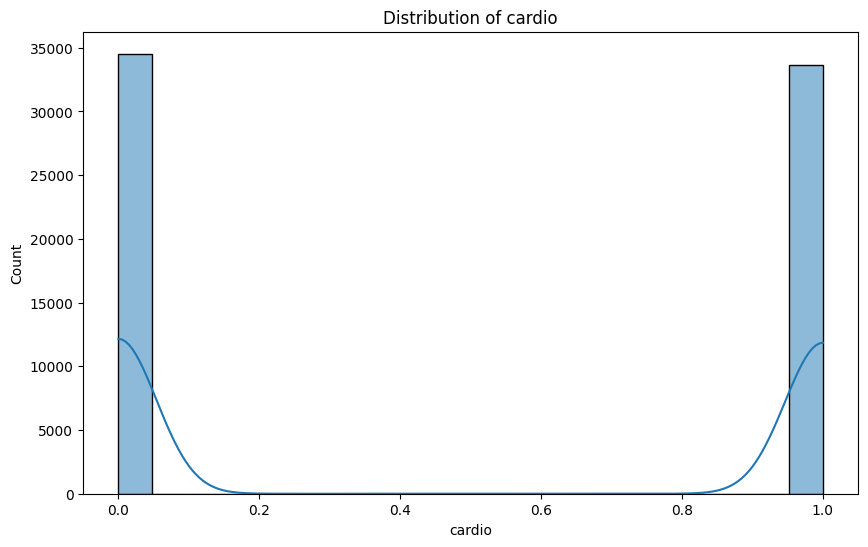

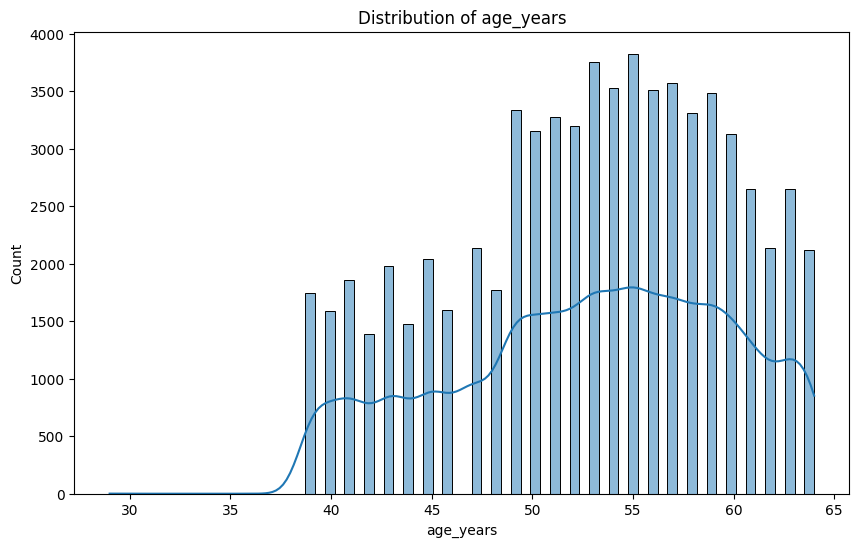

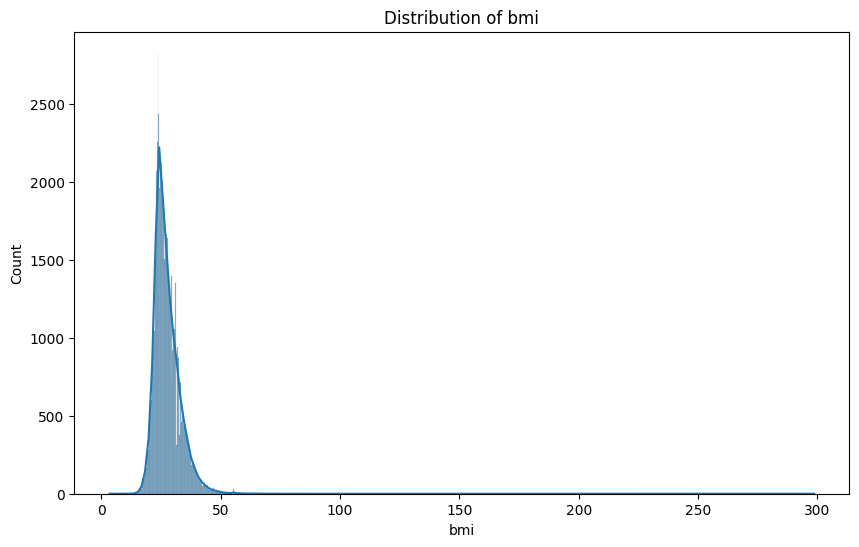

In [ ]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(raw[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 4. Preprocessing Data

In [ ]:
processed_df = raw.copy()
processed_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [ ]:
processed_df.drop(['id'], inplace=True, axis=1)

In [ ]:
LE = LabelEncoder()
for col in object_col:
    processed_df[col] = LE.fit_transform(processed_df[col])

processed_df.sample(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
67774,19529,2,175,90.0,120,80,1,1,0,0,1,0,53,29.387755,1,1
58050,18469,1,156,76.0,120,80,1,1,0,0,1,0,50,31.229454,1,1
57966,20452,1,162,76.0,120,80,1,1,0,0,1,1,56,28.959000,1,1
49576,20978,1,169,72.0,140,90,1,1,0,0,0,1,57,25.209201,2,2
37005,20547,1,169,74.0,120,80,1,1,0,0,1,1,56,25.909457,1,1


<Axes: >

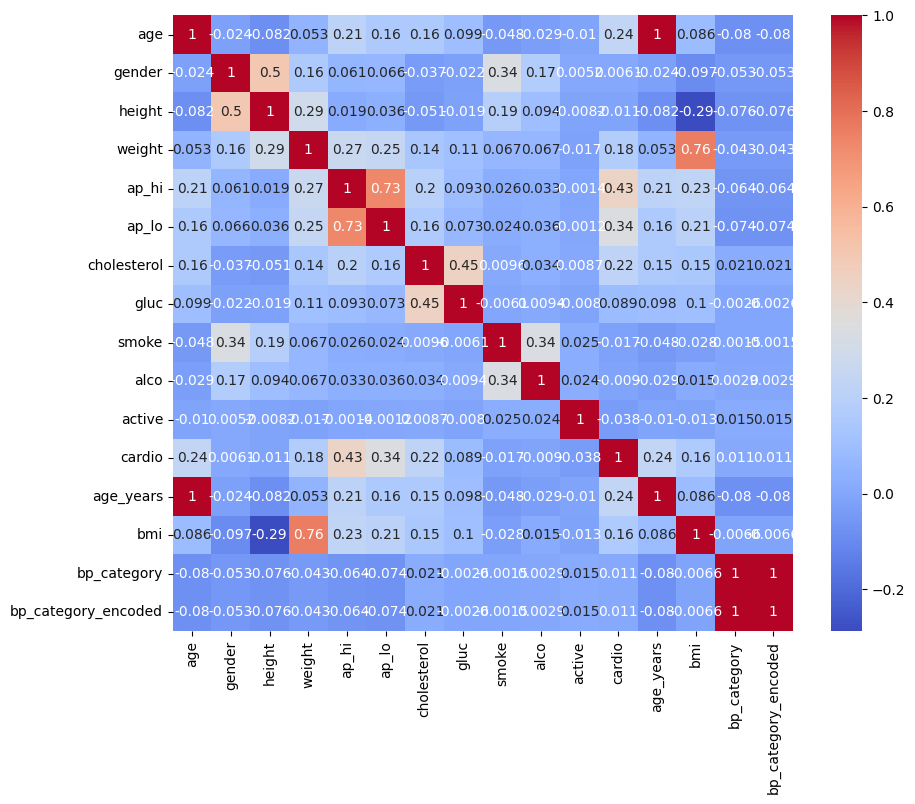

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(processed_df.corr(),cmap="coolwarm",annot=True)

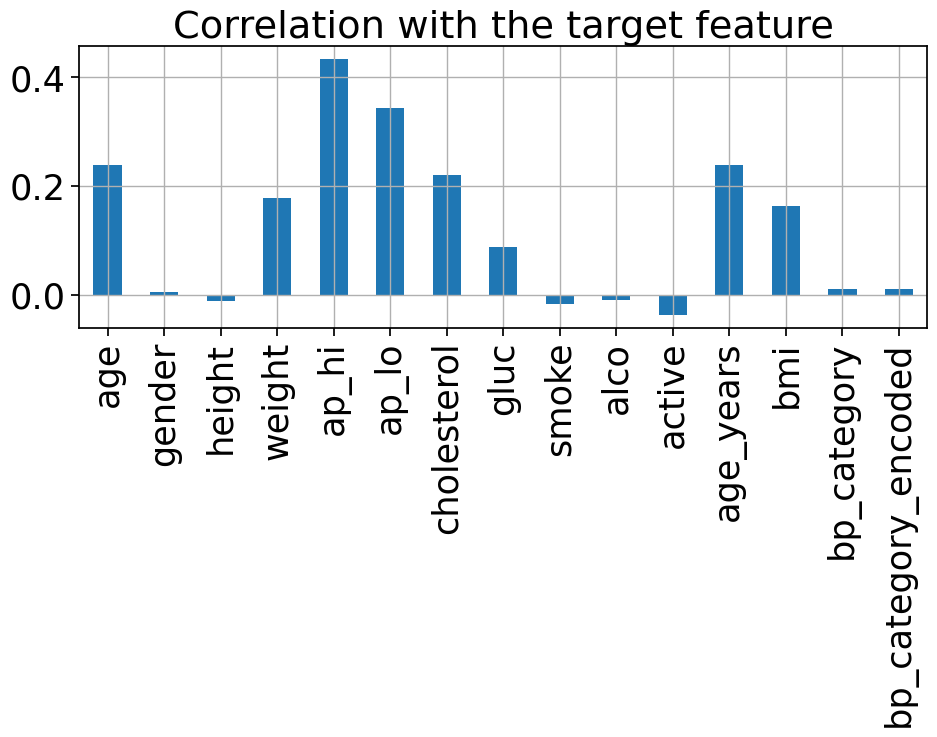

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
processed_df.drop('cardio', axis=1).corrwith(processed_df['cardio']).plot(kind='bar', grid=True, figsize=(10, 8), title="Correlation with the target feature")
plt.tight_layout()

## 5. Selection Features

In [ ]:
df = processed_df.copy()

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

### SelectKBest

In [ ]:
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

In [ ]:
scores = selector.scores_
p_values = selector.pvalues_

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores,
    'P-value': p_values
})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Scores & P-Value of Features:")
print(feature_scores)

Scores & P-Value of Features:
                Feature         Score        P-value
4                 ap_hi  15809.878264   0.000000e+00
5                 ap_lo   9087.890630   0.000000e+00
0                   age   4133.014881   0.000000e+00
11            age_years   4127.272155   0.000000e+00
6           cholesterol   3494.763666   0.000000e+00
3                weight   2227.232900   0.000000e+00
12                  bmi   1858.725951   0.000000e+00
7                  gluc    543.383523  1.020087e-119
10               active     98.334678   3.663222e-23
8                 smoke     18.723857   1.512951e-05
2                height      8.672817   3.231006e-03
13          bp_category      8.510550   3.532084e-03
14  bp_category_encoded      8.510550   3.532084e-03
9                  alco      5.571294   1.826006e-02
1                gender      2.535871   1.112901e-01


In [ ]:
best_features = feature_scores.sort_values(by='Score', ascending=False).head(8)

In [ ]:
X_best = df.loc[:, best_features['Feature']]
print(f'Data Best Features:\n{X_best}')

Data Best Features:
       ap_hi  ap_lo    age  age_years  cholesterol  weight        bmi  gluc
0        110     80  18393         50            1    62.0  21.967120     1
1        140     90  20228         55            3    85.0  34.927679     1
2        130     70  18857         51            3    64.0  23.507805     1
3        150    100  17623         48            1    82.0  28.710479     1
4        100     60  17474         47            1    56.0  23.011177     1
...      ...    ...    ...        ...          ...     ...        ...   ...
68200    120     80  19240         52            1    76.0  26.927438     1
68201    140     90  22601         61            2   126.0  50.472681     2
68202    180     90  19066         52            3   105.0  31.353579     1
68203    135     80  22431         61            1    72.0  27.099251     2
68204    120     80  20540         56            2    72.0  24.913495     1

[68205 rows x 8 columns]


### Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_best)
X_scaled = pd.DataFrame(X_scaled, columns=X_best.columns)
print(f"Data Setelah Scaling:\n{X_scaled}")

Data Setelah Scaling:
          ap_hi     ap_lo       age  age_years  cholesterol    weight  \
0     -1.029656 -0.138226 -0.433351  -0.417089    -0.535698 -0.846868   
1      0.849859  0.955397  0.310057   0.321479     2.413830  0.762789   
2      0.223354 -1.231849 -0.245372  -0.269376     2.413830 -0.706898   
3      1.476363  2.049021 -0.745298  -0.712516    -0.535698  0.552834   
4     -1.656161 -2.325472 -0.805662  -0.860230    -0.535698 -1.266778   
...         ...       ...       ...        ...          ...       ...   
68200 -0.403151 -0.138226 -0.090209  -0.121662    -0.535698  0.132924   
68201  0.849859  0.955397  1.271422   1.207760     0.939066  3.632178   
68202  3.355878  0.955397 -0.160701  -0.121662     2.413830  2.162491   
68203  0.536606 -0.138226  1.202551   1.207760    -0.535698 -0.147017   
68204 -0.403151 -0.138226  0.436456   0.469192     0.939066 -0.147017   

            bmi      gluc  
0     -0.919843 -0.394154  
1      1.230768 -0.394154  
2     -0.664190 -

## 6. Spliting Data

In [ ]:
X = X_scaled.copy()
y = df['cardio']

In [ ]:
print(f'X: {X}')
print(f'y: {y}')

X:           ap_hi     ap_lo       age  age_years  cholesterol    weight  \
0     -1.029656 -0.138226 -0.433351  -0.417089    -0.535698 -0.846868   
1      0.849859  0.955397  0.310057   0.321479     2.413830  0.762789   
2      0.223354 -1.231849 -0.245372  -0.269376     2.413830 -0.706898   
3      1.476363  2.049021 -0.745298  -0.712516    -0.535698  0.552834   
4     -1.656161 -2.325472 -0.805662  -0.860230    -0.535698 -1.266778   
...         ...       ...       ...        ...          ...       ...   
68200 -0.403151 -0.138226 -0.090209  -0.121662    -0.535698  0.132924   
68201  0.849859  0.955397  1.271422   1.207760     0.939066  3.632178   
68202  3.355878  0.955397 -0.160701  -0.121662     2.413830  2.162491   
68203  0.536606 -0.138226  1.202551   1.207760    -0.535698 -0.147017   
68204 -0.403151 -0.138226  0.436456   0.469192     0.939066 -0.147017   

            bmi      gluc  
0     -0.919843 -0.394154  
1      1.230768 -0.394154  
2     -0.664190 -0.394154  
3      0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(f'df: {df.shape}')
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

df: (68205, 16)
X_train: (51153, 8)
X_test: (17052, 8)
y_train: (51153,)
y_test: (17052,)


## 7. Modeling

In [ ]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
pred = model_gb.predict(X_test)

## 8. Evaluate Model Default

Confusion Matrix:
[[6696 1969]
 [2579 5808]]


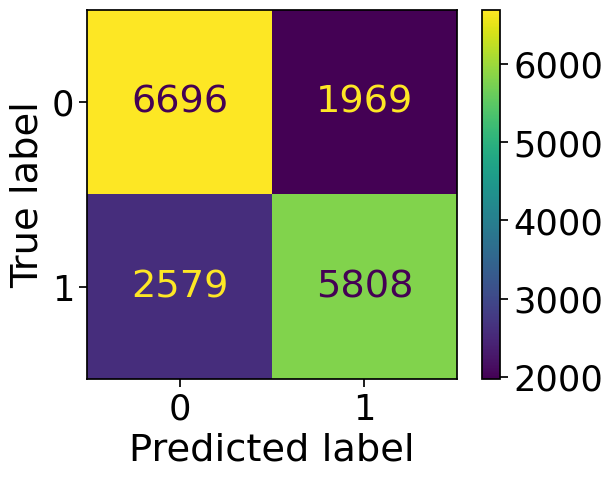

In [ ]:
cm = confusion_matrix(y_test, pred)
print(f'Confusion Matrix:\n{cm}')
cmd = ConfusionMatrixDisplay(cm, display_labels=model_gb.classes_)
cmd.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      8665
           1       0.75      0.69      0.72      8387

    accuracy                           0.73     17052
   macro avg       0.73      0.73      0.73     17052
weighted avg       0.73      0.73      0.73     17052



## 9. Model Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(model_gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Score: 0.7324106359135257


In [ ]:
best_model = grid_search.best_estimator_.predict(X_test)

## 10. Evaluate Model Tuning

Confusion Matrix:
[[6746 1919]
 [2643 5744]]


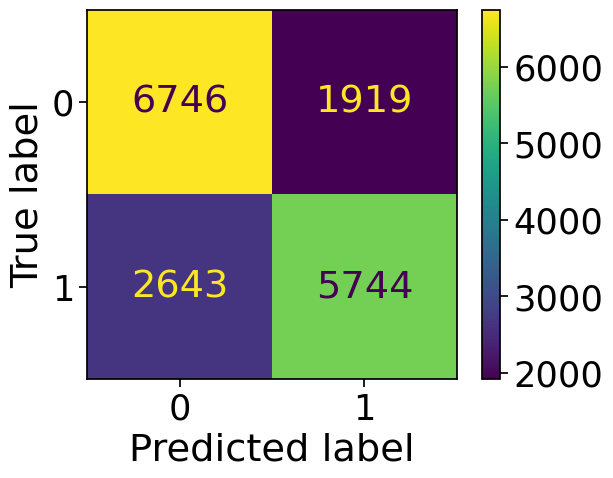

In [ ]:
cm = confusion_matrix(y_test, best_model)
print(f'Confusion Matrix:\n{cm}')
cmd = ConfusionMatrixDisplay(cm, display_labels=model_gb.classes_)
cmd.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      8665
           1       0.75      0.69      0.72      8387

    accuracy                           0.73     17052
   macro avg       0.73      0.73      0.73     17052
weighted avg       0.73      0.73      0.73     17052



In [ ]:
from joblib import dump, load

# Menyimpan model
dump(grid_search.best_estimator_, 'cardio_model.joblib')
print("Model saved as 'cardio_model.joblib'")

Model saved as 'cardio_model.joblib'
